<a href="https://colab.research.google.com/github/josep29/TDR/blob/main/Flowers_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudi d'algorismes de classificació

Activitat realitzada per:

* Josep Picanyol

En aquesta activitat, adjunta al projecte TDR, és per veure com funcionen els diferents models de classificació, així veient amb el tipus de dades que tenim, quin és el tipus de model que millor s'adapta.

Podem veure que per aquest programa s'utilitzarà una llibreria de fotografies de flors, simulant els elements de la vida quotidiana.

El dataset d'imatges es pot descarregar aquí:


[flower_photos](https://doi.org/10.7910/DVN/1ECTVN) (~800Mb)

## Cites:

La cita del *dataset* utilitzat per a crear el programa:

In [1]:
# @data{DVN/1ECTVN_2020,
# author = {Tung, K},
# publisher = {Harvard Dataverse},
# title = {{Flowers Dataset}},
# UNF = {UNF:6:z6JGwpi2tftxFU+tbVH/3g==},
# year = {2020},
# version = {V8},
# doi = {10.7910/DVN/1ECTVN},
# url = {https://doi.org/10.7910/DVN/1ECTVN}
# }

Programa creat mijançant la llibreria *TensorFlow* i basat en el tutorial [*Image Classification*](https://www.tensorflow.org/tutorials/images/classification)

In [2]:
# @misc{tensorflow2015-whitepaper,
# title={ {TensorFlow}: Large-Scale Machine Learning on Heterogeneous Systems},
# url={https://www.tensorflow.org/},
# note={Software available from tensorflow.org},
# author={
#     Mart\'{i}n~Abadi and
#     Ashish~Agarwal and
#     Paul~Barham and
#     Eugene~Brevdo and
#     Zhifeng~Chen and
#     Craig~Citro and
#     Greg~S.~Corrado and
#     Andy~Davis and
#     Jeffrey~Dean and
#     Matthieu~Devin and
#     Sanjay~Ghemawat and
#     Ian~Goodfellow and
#     Andrew~Harp and
#     Geoffrey~Irving and
#     Michael~Isard and
#     Yangqing Jia and
#     Rafal~Jozefowicz and
#     Lukasz~Kaiser and
#     Manjunath~Kudlur and
#     Josh~Levenberg and
#     Dandelion~Man\'{e} and
#     Rajat~Monga and
#     Sherry~Moore and
#     Derek~Murray and
#     Chris~Olah and
#     Mike~Schuster and
#     Jonathon~Shlens and
#     Benoit~Steiner and
#     Ilya~Sutskever and
#     Kunal~Talwar and
#     Paul~Tucker and
#     Vincent~Vanhoucke and
#     Vijay~Vasudevan and
#     Fernanda~Vi\'{e}gas and
#     Oriol~Vinyals and
#     Pete~Warden and
#     Martin~Wattenberg and
#     Martin~Wicke and
#     Yuan~Yu and
#     Xiaoqiang~Zheng},
#   year={2015},
# }


## Importació de llibreries utilitzades en el programa:
* `numpy`: llibreria per calcular amb matrius
* `os`: llibreria per navegar en el directori
* `cv2`: llibreria per expressar imatges de forma numèrica

In [86]:
import numpy as np
import os
import cv2
import random

In [87]:
def load_Dataset(dirname, map_characters, IMG_SIZE, verbose=True):
  # Fa una càrrega d'imatges en uns valors.

  # Com que les imatges tenen tamanys diferents, utilitzarem la llibreria OpenCV
  # per fer un resize.

  # Args:
  # dirname: directori del qual s'han de llegir les dades
  # map_characters: variable de mapatge entre etiquetes i tipus d'imatge
  # verbose: si és True, mostra la informació de les imatges carregades

  # Retorna:
  # X, y: X és una matriu amb totes les imatges carregades amb una shape de [IMG_SIZE x IMG_SIZE]
  # y. és una matriu amb totes les etiquetes corresponents a cada imatge.

  X = []
  y = []
  for label, character in map_characters.items():
      files = os.listdir(os.path.join(dirname, character))
      images = [file for file in files if file.endswith(".jpg")]
      if verbose:
        print("Llegint {} imatges trobades sobre {}".format(len(images), character))
      for image_name in images:
        n = random.randint(0, len(images))
        image = cv2.imread(os.path.join(dirname, character, image_name))
        X.insert(n, cv2.resize(image, (IMG_SIZE, IMG_SIZE)))
        y.insert(n, label)
  return np.array(X), np.array(y)

In [88]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importació i localització de les dades

Descàrrega de la carpeta zip amb totes les dades

In [89]:
# !wget -q -O /content/gdrive/MyDrive/Colab_Notebooks/Data/flowers.zip # enllaç


Organització de les carpetes per poder trobar el *dataset* fàcilment

In [ ]:
!unzip -q /content/gdrive/MyDrive/Colab_Notebooks/Data/flowers.zip

Assignació dels directoris a variables

In [91]:
test_dir = '/content/flowers/flower_photos/test'
train_dir = '/content/flowers/flower_photos/train'
val_dir = '/content/flowers/flower_photos/validation'

Mapatge de les dades sobre les imatges i la mida que tindran les nostres imatges

In [92]:
flowers_mapca = {
    0: 'Margarides', 1: 'Xicoies', 2: 'Roses',
    3: 'Gira-sols', 4: 'Tulipes'
}
flowers_map = {
    0: 'daisy', 1: 'dandelion', 2: 'roses',
    3: 'sunflowers', 4: 'tulips'
}

img_size = 64

Càrrega de les dades mitjançant aplicacions de `cv2`

In [95]:
X, y = load_Dataset(train_dir, flowers_map, img_size, verbose=False)
X_t, y_t = load_Dataset(test_dir, flowers_map, img_size, verbose=False)
X_v, y_v = load_Dataset(val_dir, flowers_map, img_size, verbose=False)

## Imports
* `matplotlib`: llibreria per la creació i representació de gràfiques
* `seaborn`: llibreria d'ampliació a matplotlib, per la creació i representació de gràfiques
* `tensorflow`: biblioteca amb algorismes per crear i representar l'aprenentatge automàtic
* `sklearn`: biblioteca amb algorismes per crear i representar l'aprenentatge automàtic
* `cv2_imshow`: funció per representar imatges en un format de matriu a Google Colab
* `pandas`: biblioteca per tractar grans quantitats de dades distribuïdes en taules

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix

from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
def data_count(dirname, map_characters):
  # Imprimeix la quantitat de dades de cada categoria.

  # Args:
  # dirname: el directori on estan les fotos
  # map_characters: un mapatge de les etiquetes de fotos que hi han

  # Retorna:
  # text: On s'especifica la quantitat d'imatges de cada tipus

  tcount = 0
  for label, character in map_characters.items():
    files = os.listdir(os.path.join(dirname, character))
    count = len([file for file in files if file.endswith("jpg")])
    print("Trobades {} imatges sobre {}".format(count, character))
    tcount += count
  return  print('Trobades {} imatges en total'.format(tcount))

def get_image(X, y, n):
  # Retorna la primera imatge de la variable

  # Arguments:
  # X: matriu amb les imatges carregades
  # y: matriu amb les etiquetes de les imatges
  # n: categoria d'imatge que es vol obtenir

  # Retorna:
  # img: una matriu amb les dades d'una imatge específica de la categoria n

  b = 0
  for label in y:

    if label == n:
      img = X[b]
      break
    b += 1
  return img

def plot_acc_loss(history, titleacc="Model Accuracy", titleloss="Model Loss"):
  # Imprimeix l'accuracy i el loss de l'entrenament i de la validació

  # Args:
  #     history: el procés d'entrenament d'un model (history = model.fit())
  #     titleacc: El títol del gràfic que representa l'accuracy
  #     titleloss: El títol del gràfic que representa el loss

  # Retorna:
  #     imatge: Imatge de dos gràfics de l'accuracy i el loss

  fig = plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 1)
  plt.plot(history.history['accuracy'], label='acc')
  plt.plot(history.history['val_accuracy'], label='val_acc')
  plt.title(titleacc)
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid()

  plt.subplot(2, 1, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title(titleloss)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid()
  plt.show()

def plot_confusion_matrix(x, Y, model, map_characters, title='Model Confusion Matrix', c='Greens'):
  # Imprimeix un gràfic on es veu la matriu de confusió,
  # per veure en quines etiquetes és més eficient el model

  # Arguments:
  # X: matriuamb les imatges carregades
  # y: matriu amb les etiquetes de les imatges
  # model: El model entrenat del qual es vol obtenir el gràfic de confusió
  # map_character: un mapatge del tipus d'imatges
  # c: el color del gràfic de la matriu de confusió

  # Retorna:
  # imatge: Imatge del gràfic de la matriu de confusió

  y_predict = np.array([])
  predictions = model.predict(x, verbose=0)
  for label in range(x.shape[0]):
    score = np.array([np.argmax(predictions[label])])
    y_predict = np.append(y_predict, score)

  cm=confusion_matrix(Y, y_predict)
  columns = []
  for label, flower in map_characters.items():
    columns.append(flower)
  df=pd.DataFrame(cm, index=columns,
                columns=columns)

  fig = plt.figure(figsize=(15,10))
  sn.heatmap(df, annot=True, cmap=c)
  plt.title(title)
  plt.show()

## Anàlisis de Dades

Visualització de la quantitat d'imatges separades per categories

In [98]:
data_count(train_dir, flowers_map) # Imatges d'entrenament

Trobades 607 imatges sobre daisy
Trobades 872 imatges sobre dandelion
Trobades 615 imatges sobre roses
Trobades 673 imatges sobre sunflowers
Trobades 773 imatges sobre tulips
Trobades 3540 imatges en total


In [99]:
data_count(test_dir, flowers_map) # Imatges de test

Trobades 10 imatges sobre daisy
Trobades 10 imatges sobre dandelion
Trobades 10 imatges sobre roses
Trobades 10 imatges sobre sunflowers
Trobades 10 imatges sobre tulips
Trobades 50 imatges en total


In [100]:
data_count(val_dir, flowers_map) # Imatges de validació

Trobades 16 imatges sobre daisy
Trobades 16 imatges sobre dandelion
Trobades 16 imatges sobre roses
Trobades 16 imatges sobre sunflowers
Trobades 16 imatges sobre tulips
Trobades 80 imatges en total


Visualització del tamany X, en concret fa referència al conjunt d'imatges

In [101]:
X.shape

(3540, 64, 64, 3)

El tamany de X correspon a la quantitat de píxels `[64, 64]`

In [102]:
X[0].size

12288

Els valors màxims i mínims de les imatges, corresponents al RGB, tenen un rang de `[0, 255]`

In [103]:
print('El valor màxim: {}'.format(np.amax(X)))
print('El valor mínim: {}'.format(np.amin(X)))

El valor màxim: 255
El valor mínim: 0


Els valors màxims i mínims de les etiquetes, corresponents als tipus de flors, tenen un rang de `[0, 4]`

In [104]:
print('El valor màxim: {}'.format(np.amax(y)))
print('El valor mínim: {}'.format(np.amin(y)))

El valor màxim: 4
El valor mínim: 0


Visualització d'imatges

Daisy:


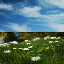


Dandelion:


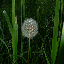


Rose:


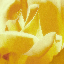


Sunflower:


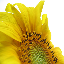


Tulip:


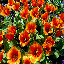

In [105]:
daisy = get_image(X, y, 0)
dandelion = get_image(X, y, 1)
rose = get_image(X, y, 2)
sunflower = get_image(X, y, 3)
tulip = get_image(X, y, 4)

print('Daisy:')
cv2_imshow(daisy)
print('\nDandelion:')
cv2_imshow(dandelion)
print('\nRose:')
cv2_imshow(rose)
print('\nSunflower:')
cv2_imshow(sunflower)
print('\nTulip:')
cv2_imshow(tulip)

S'aplicarà una normalització de les dades, perquè la xarxa neuronal sigui més eficient, és a dir que ara els valors del *RGB* estaran entre els valors `[0, 1]`.

In [106]:
X = X/255
X_t = X_t/255
X_v = X_v/255

In [107]:
print('El valor màxim: {}'.format(np.amax(X)))
print('El valor mínim: {}'.format(np.amin(X)))

El valor màxim: 1.0
El valor mínim: 0.0


## **Models**


### Model Inicial - DNN
Aquest model és anomenat *fully connected*, perquè només fa el procés d'una *DNN*:
* Tenim una capa `Flatten` per passar-ho a un vector d'una dimensió, després tenim 3 capes `Dens, una amb 64 neurones, una amb 128 neurones i una final amb 5 neurones.

Utilitzarem la funció d'activació `ReLu`*(f(x)=max(0, x))*, en les capes de convolucionals i en la primera capa `Dense`, en l'última capa utilitzarem la funció `SoftMax`.

Com a optimitzador es farà ús de l'optimitzador *SGD*, conegut com a Gradient descent (with momentum) optimizer.

In [23]:
model = models.Sequential([
    # Aplanació dels resultats per encaixar-ho amb una DNN
    layers.Flatten(input_shape=X.shape[1:], name='Input_Flatten'),

    # Capa amagada amb 64
    layers.Dense(64, activation='relu', name='fullyconnected'),
    layers.Dense(128, activation='relu', name='fullyconnected_'),
    # Capa output
    layers.Dense(5, activation='softmax', name='output')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005, momentum=0.3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Flatten (Flatten)     (None, 12288)             0         
                                                                 
 fullyconnected (Dense)      (None, 64)                786496    
                                                                 
 fullyconnected_ (Dense)     (None, 128)               8320      
                                                                 
 output (Dense)              (None, 5)                 645       
                                                                 
Total params: 795,461
Trainable params: 795,461
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X, y, batch_size=64, epochs=30, verbose=2, validation_data=(X_v, y_v))

Epoch 1/30
56/56 - 3s - loss: 1.6240 - accuracy: 0.2051 - val_loss: 1.6094 - val_accuracy: 0.1875 - 3s/epoch - 61ms/step
Epoch 2/30
56/56 - 0s - loss: 1.5826 - accuracy: 0.2867 - val_loss: 1.5894 - val_accuracy: 0.2500 - 174ms/epoch - 3ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5567 - accuracy: 0.3277 - val_loss: 1.5715 - val_accuracy: 0.2500 - 184ms/epoch - 3ms/step
Epoch 4/30
56/56 - 0s - loss: 1.5312 - accuracy: 0.3463 - val_loss: 1.5481 - val_accuracy: 0.2750 - 178ms/epoch - 3ms/step
Epoch 5/30
56/56 - 0s - loss: 1.5052 - accuracy: 0.3551 - val_loss: 1.5261 - val_accuracy: 0.2625 - 176ms/epoch - 3ms/step
Epoch 6/30
56/56 - 0s - loss: 1.4823 - accuracy: 0.3709 - val_loss: 1.5070 - val_accuracy: 0.3125 - 177ms/epoch - 3ms/step
Epoch 7/30
56/56 - 0s - loss: 1.4615 - accuracy: 0.3802 - val_loss: 1.4930 - val_accuracy: 0.3250 - 173ms/epoch - 3ms/step
Epoch 8/30
56/56 - 0s - loss: 1.4421 - accuracy: 0.3904 - val_loss: 1.4765 - val_accuracy: 0.3125 - 184ms/epoch - 3ms/step
Epoch 9/30
56/56 -

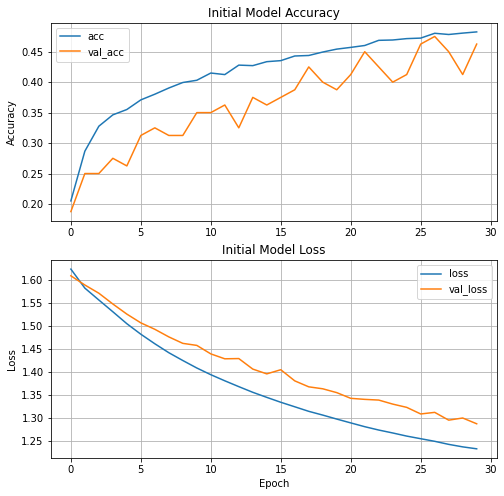

In [26]:
plot_acc_loss(history, 'Initial Model Accuracy', 'Initial Model Loss')

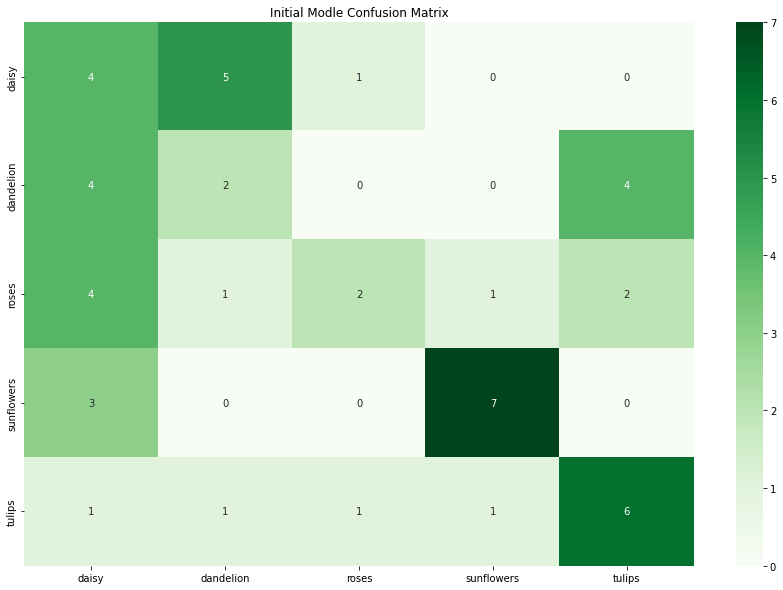

In [28]:
plot_confusion_matrix(X_t, y_t, model, flowers_map, 'Initial Modle Confusion Matrix')

### Model 1
Aquest model esta separat en dues parts:
* En la primera part del model, tenim 4 capes de convolucionals de 16, 32, 64 i 128 la qual ens dona 32 mapeig de les caracteristiques, a més a més utilitzem una capa `MaxPooling2D` de `[2, 2]`, que ens redueix la imatge, fent l'elecció  dels pixels amb el valor més gran cada grup de *2 · 2* pixels.

* En la segona part del model, tenim una capa `Flatten` per passaro a vector, amb un `Dropout` de 0.5 per a evitar un *overfiting*, després  tenim 2 capes `Dense`, una amb 64 neurones i una final amb 5 neurones.

Utilitzarem la funció d'activació `ReLu` *(f(x)=max(0, x))*, en les capes de convolucionals i en la primera capa `Dense`, en l'ultima capa utilitzarem la funció `SoftMax`.

Com a optimitzador utilitzarem l'optimitzador *SGD*, conegut com a Gradient descent (with momentum) optimizer.

In [29]:
model1 = models.Sequential([
    # Primera Convolució amb les dades d'entrada input
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X.shape[1:], name='Input_conv1'),
    layers.MaxPooling2D(2,2),

    # Aplanació dels resultats per encaixar-ho amb una DNN
    layers.Dropout(0.2),
    layers.Flatten(),

    # Capa amagada de 64 neurones
    layers.Dense(64, activation='relu', name='fullyconnected'),
    layers.Dense(128, activation='relu', name='fullyconnected_'),
    # Capa del output
    layers.Dense(5, activation='softmax', name="output")
])

model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_conv1 (Conv2D)        (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 fullyconnected (Dense)      (None, 64)                2097216   
                                                                 
 fullyconnected_ (Dense)     (None, 128)               8320      
                                                      

In [31]:
history1 = model1.fit(X, y, epochs=30, batch_size=64, verbose=2, validation_data=(X_v, y_v))

Epoch 1/30
56/56 - 6s - loss: 1.6017 - accuracy: 0.2412 - val_loss: 1.6122 - val_accuracy: 0.2250 - 6s/epoch - 111ms/step
Epoch 2/30
56/56 - 0s - loss: 1.5808 - accuracy: 0.2777 - val_loss: 1.6077 - val_accuracy: 0.2250 - 353ms/epoch - 6ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5582 - accuracy: 0.3234 - val_loss: 1.5838 - val_accuracy: 0.3125 - 355ms/epoch - 6ms/step
Epoch 4/30
56/56 - 0s - loss: 1.5353 - accuracy: 0.3387 - val_loss: 1.5644 - val_accuracy: 0.2875 - 366ms/epoch - 7ms/step
Epoch 5/30
56/56 - 0s - loss: 1.5133 - accuracy: 0.3494 - val_loss: 1.5480 - val_accuracy: 0.2875 - 357ms/epoch - 6ms/step
Epoch 6/30
56/56 - 0s - loss: 1.4904 - accuracy: 0.3585 - val_loss: 1.5188 - val_accuracy: 0.3375 - 362ms/epoch - 6ms/step
Epoch 7/30
56/56 - 0s - loss: 1.4698 - accuracy: 0.3729 - val_loss: 1.4987 - val_accuracy: 0.3375 - 354ms/epoch - 6ms/step
Epoch 8/30
56/56 - 0s - loss: 1.4477 - accuracy: 0.3845 - val_loss: 1.4866 - val_accuracy: 0.3750 - 356ms/epoch - 6ms/step
Epoch 9/30
56/56 

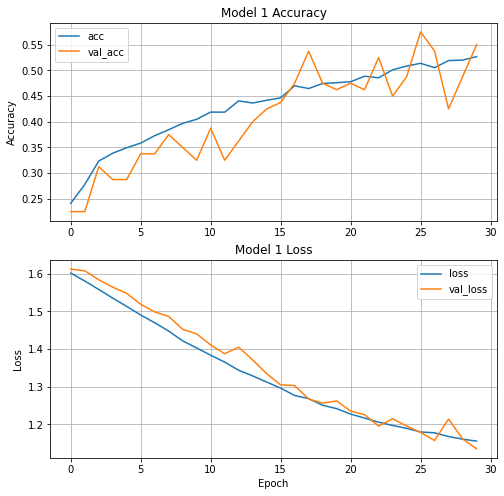

In [32]:
plot_acc_loss(history1, "Model 1 Accuracy", "Model 1 Loss")

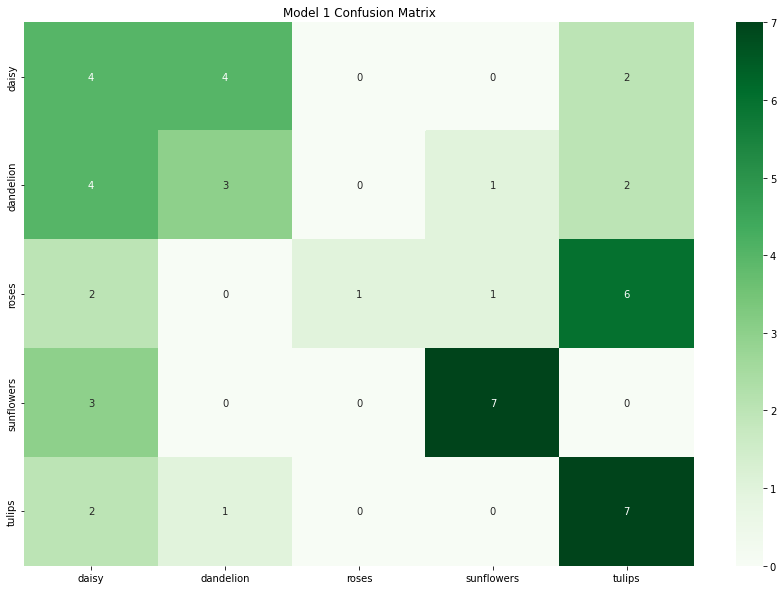

In [33]:
plot_confusion_matrix(X_t, y_t, model1, flowers_map, 'Model 1 Confusion Matrix')

### Model 2
Ampliació de les convolucionals, ara es farà ús de 4 convolucions a més a més d'utilitzar l'optimitzador *Adam*.

In [34]:
model2 = models.Sequential([
    # Primera Convolució amb les dades d'entrada input
    layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X.shape[1:], name='Input_conv1'),
    layers.MaxPooling2D(2, 2),
    # Segona convolució
    layers.Conv2D(32, (3,3), padding='same', activation='relu', name='conv2'),
    layers.MaxPooling2D(2,2),
    # Tercera convolució
    layers.Conv2D(64, (3,3), padding='same', activation='relu', name='conv3'),
    layers.MaxPooling2D(2,2),
    # Quarta convolució
    layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv4'),
    layers.MaxPooling2D(2,2),

    # Aplanació dels resultats per encaixar-ho amb una DNN
    layers.Flatten(),
    layers.Dropout(0.2),

    # Capa amagada de 64 neurones
    layers.Dense(64, activation='relu', name='fullyconnected'),
    layers.Dense(128, activation='relu', name='fullyconnected_'),
    # Capa del output
    layers.Dense(5, activation='softmax', name='output')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_conv1 (Conv2D)        (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)        

In [36]:
history2 = model2.fit(X, y, batch_size=64, epochs=30, verbose=2, validation_data=(X_v, y_v))

Epoch 1/30
56/56 - 2s - loss: 1.6019 - accuracy: 0.2285 - val_loss: 1.6150 - val_accuracy: 0.3000 - 2s/epoch - 28ms/step
Epoch 2/30
56/56 - 0s - loss: 1.5789 - accuracy: 0.3254 - val_loss: 1.5747 - val_accuracy: 0.3500 - 369ms/epoch - 7ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5071 - accuracy: 0.3760 - val_loss: 1.4483 - val_accuracy: 0.3875 - 376ms/epoch - 7ms/step
Epoch 4/30
56/56 - 0s - loss: 1.3823 - accuracy: 0.4246 - val_loss: 1.3070 - val_accuracy: 0.4875 - 372ms/epoch - 7ms/step
Epoch 5/30
56/56 - 0s - loss: 1.3069 - accuracy: 0.4602 - val_loss: 1.3036 - val_accuracy: 0.4625 - 380ms/epoch - 7ms/step
Epoch 6/30
56/56 - 0s - loss: 1.2661 - accuracy: 0.4797 - val_loss: 1.1956 - val_accuracy: 0.5500 - 371ms/epoch - 7ms/step
Epoch 7/30
56/56 - 0s - loss: 1.2412 - accuracy: 0.4828 - val_loss: 1.2160 - val_accuracy: 0.5375 - 372ms/epoch - 7ms/step
Epoch 8/30
56/56 - 0s - loss: 1.2120 - accuracy: 0.5116 - val_loss: 1.2048 - val_accuracy: 0.5625 - 383ms/epoch - 7ms/step
Epoch 9/30
56/56 -

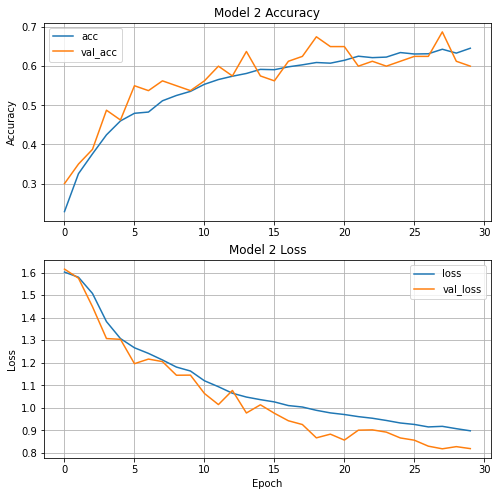

In [37]:
plot_acc_loss(history2, 'Model 2 Accuracy', 'Model 2 Loss')

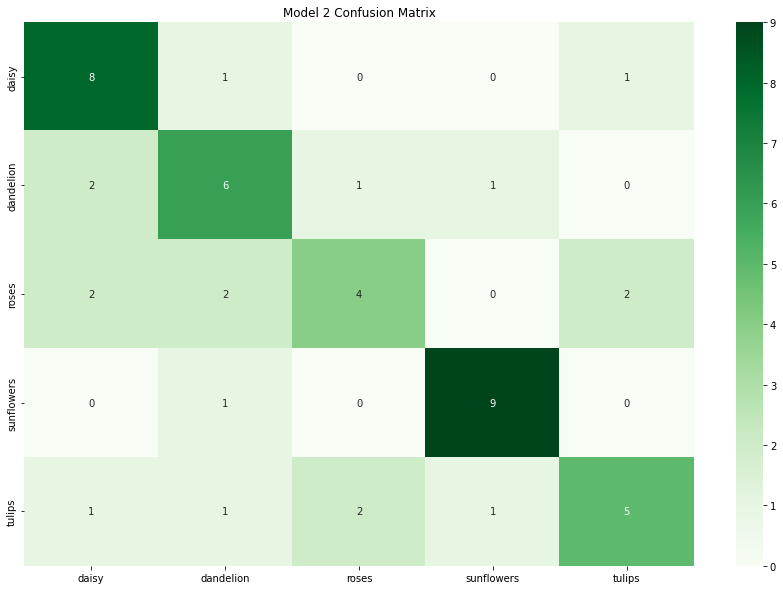

In [38]:
plot_confusion_matrix(X_t, y_t, model2, flowers_map, 'Model 2 Confusion Matrix')

### Model 3
Prova per a reduir l'*overfitting*:
* Afegim capes de `Dropout()`
* Afegim més d'una capa de convolucionals per a cada grup de convolucions.
* Afegim una capa de 'BatchNormalization()'.

In [39]:
model3 = models.Sequential([
    # Primera Convolució amb les dades d'entrada input
    layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X.shape[1:], name='Input_conv1'),
    layers.Conv2D(16, (3,3), padding='same', activation='relu', name='conv1_'),
    layers.MaxPooling2D(2, 2),
    # Segona Convolució
    layers.Dropout(0.2),
    layers.Conv2D(32, (3,3), padding='same', activation='relu', name='conv2'),
    layers.Conv2D(32, (3,3), padding='same', activation='relu', name='conv2_'),
    layers.MaxPooling2D(2,2),
    # Tercera Convolució
    layers.Dropout(0.3),
    layers.Conv2D(64, (3,3), padding='same', activation='relu', name='conv3'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu', name='conv3_'),
    layers.MaxPooling2D(2,2),
    # Quarta Convolució
    layers.Dropout(0.3),
    layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv4'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv4_'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # Aplanació dels resultats per encaixar-ho amb una DNN
    layers.Flatten(),
    layers.Dropout(0.3),

    # Capa densa de 254 neurones
    layers.Dense(254, activation='relu', name='fullyconnected'),
    layers.Dense(128, activation='relu', name='fullyconnected_'),
    # Capa densa output
    layers.Dense(5, activation='softmax', name='output')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_conv1 (Conv2D)        (None, 64, 64, 16)        448       
                                                                 
 conv1_ (Conv2D)             (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        4640      
                                                                 
 conv2_ (Conv2D)             (None, 32, 32, 32)        9248      
                                                      

In [41]:
history3 = model3.fit(X, y, batch_size=64, epochs=30, verbose=2, validation_data=(X_v, y_v))

Epoch 1/30
56/56 - 3s - loss: 1.4550 - accuracy: 0.3636 - val_loss: 1.5796 - val_accuracy: 0.4375 - 3s/epoch - 46ms/step
Epoch 2/30
56/56 - 1s - loss: 1.2068 - accuracy: 0.4924 - val_loss: 1.5454 - val_accuracy: 0.4875 - 788ms/epoch - 14ms/step
Epoch 3/30
56/56 - 1s - loss: 1.1167 - accuracy: 0.5393 - val_loss: 1.5213 - val_accuracy: 0.3250 - 769ms/epoch - 14ms/step
Epoch 4/30
56/56 - 1s - loss: 1.0317 - accuracy: 0.5743 - val_loss: 1.4799 - val_accuracy: 0.3375 - 772ms/epoch - 14ms/step
Epoch 5/30
56/56 - 1s - loss: 0.9505 - accuracy: 0.6090 - val_loss: 1.3718 - val_accuracy: 0.5250 - 776ms/epoch - 14ms/step
Epoch 6/30
56/56 - 1s - loss: 0.9033 - accuracy: 0.6395 - val_loss: 1.3035 - val_accuracy: 0.5625 - 776ms/epoch - 14ms/step
Epoch 7/30
56/56 - 1s - loss: 0.8563 - accuracy: 0.6590 - val_loss: 1.2937 - val_accuracy: 0.5500 - 771ms/epoch - 14ms/step
Epoch 8/30
56/56 - 1s - loss: 0.8127 - accuracy: 0.6737 - val_loss: 1.3614 - val_accuracy: 0.4500 - 778ms/epoch - 14ms/step
Epoch 9/30


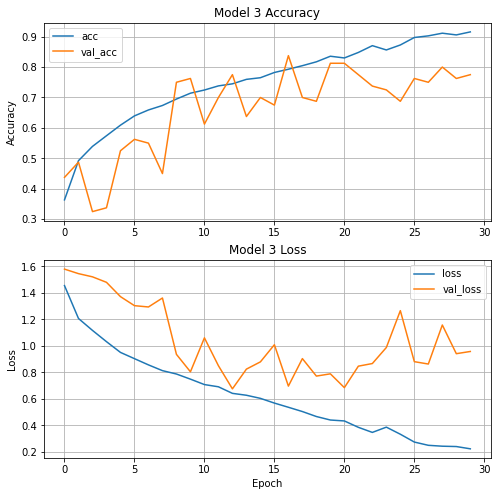

In [42]:
plot_acc_loss(history3, 'Model 3 Accuracy', 'Model 3 Loss')

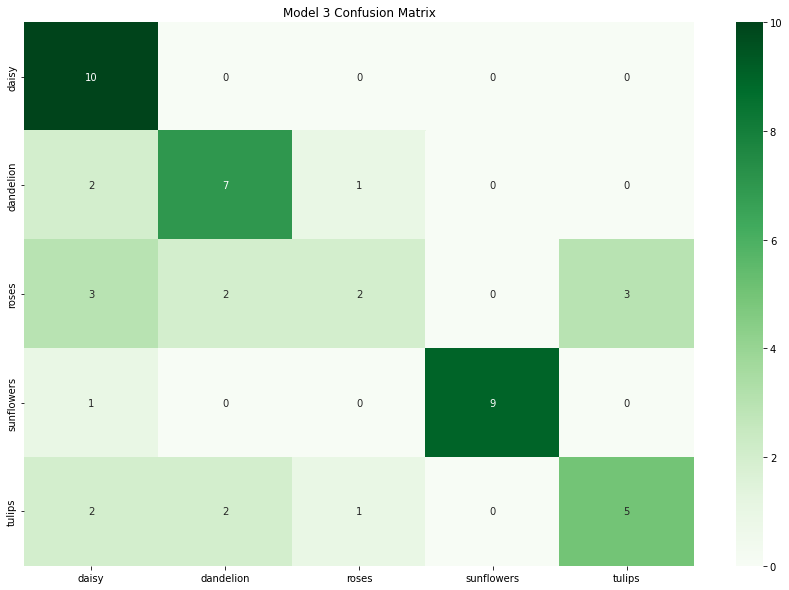

In [43]:
plot_confusion_matrix(X_t, y_t, model3, flowers_map, 'Model 3 Confusion Matrix')

Es pot observar que aquest model no ha sigut eficient, això és degut al fet que ficar moltes capes de `dropout`, el model és molt variable, per tant, per reduir l'*overfitting*, serveix ficar alguna capa, però no moltes que pot fer que el model sigui molt vari.

### Model 4
En aquest model intentarem reduir l'*overfiting*:
* Afegim més d'una capa de convolucionals per a cada grup de convolucions.
* Afegim un regularització kernel de tipus L2 (*loss = L2 * reduce_sum(square(x))*).
* Afegim una capa de `BatchNormalization()`.

In [79]:
model4 = models.Sequential([
    # Primera Convolució amb les dades d'entrada input
    layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X.shape[1:], name='Input_conv1'),
    layers.Conv2D(16, (3,3), padding='same', activation='relu', name='conv1'),
    layers.MaxPooling2D(2, 2),
    # Segona Convolució
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu', name='conv2'),
    layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005), name='conv2_'),
    layers.MaxPooling2D(2,2),
    # Tercera Convolució
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu', name='conv3'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005), name='conv3_'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    # Quarta Convolució
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv4'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005), name='conv4_'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # Aplanació dels resultats per encaixar-ho amb una DNN
    layers.Flatten(),
    layers.Dropout(0.2),

    # Capa densa amb 254 neurones
    layers.Dense(254, activation='relu', name='fullyconnected'),
    layers.Dense(128, activation='relu', name='fullyconnected_'),

    # Capa densa output
    layers.Dense(5, activation='softmax', name='output')
])
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model4.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_conv1 (Conv2D)        (None, 64, 64, 16)        448       
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        4640      
                                                                 
 conv2_ (Conv2D)             (None, 32, 32, 32)       

In [81]:
history4 = model4.fit(X, y, batch_size=64, epochs=30, verbose=2, validation_data=(X_v, y_v))

Epoch 1/30
56/56 - 2s - loss: 2.1610 - accuracy: 0.2237 - val_loss: 1.7212 - val_accuracy: 0.2000 - 2s/epoch - 37ms/step
Epoch 2/30
56/56 - 1s - loss: 1.7439 - accuracy: 0.3113 - val_loss: 1.7286 - val_accuracy: 0.2000 - 742ms/epoch - 13ms/step
Epoch 3/30
56/56 - 1s - loss: 1.6001 - accuracy: 0.3935 - val_loss: 1.7590 - val_accuracy: 0.2000 - 751ms/epoch - 13ms/step
Epoch 4/30
56/56 - 1s - loss: 1.4965 - accuracy: 0.4407 - val_loss: 1.8405 - val_accuracy: 0.2000 - 755ms/epoch - 13ms/step
Epoch 5/30
56/56 - 1s - loss: 1.4307 - accuracy: 0.4791 - val_loss: 1.9663 - val_accuracy: 0.2000 - 753ms/epoch - 13ms/step
Epoch 6/30
56/56 - 1s - loss: 1.3628 - accuracy: 0.5008 - val_loss: 2.1454 - val_accuracy: 0.2000 - 743ms/epoch - 13ms/step
Epoch 7/30
56/56 - 1s - loss: 1.3175 - accuracy: 0.5251 - val_loss: 2.2593 - val_accuracy: 0.2125 - 744ms/epoch - 13ms/step
Epoch 8/30
56/56 - 1s - loss: 1.2720 - accuracy: 0.5387 - val_loss: 2.2650 - val_accuracy: 0.2125 - 746ms/epoch - 13ms/step
Epoch 9/30


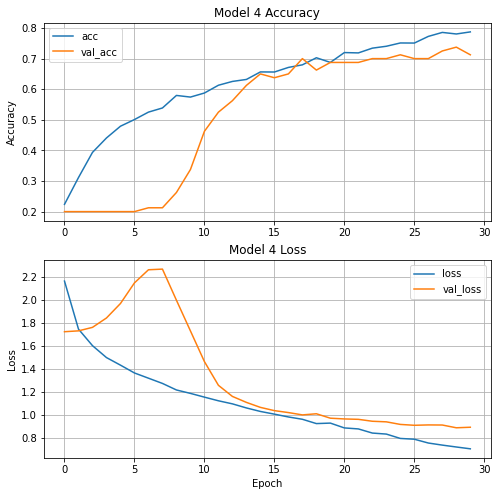

In [82]:
plot_acc_loss(history4, 'Model 4 Accuracy', 'Model 4 Loss')

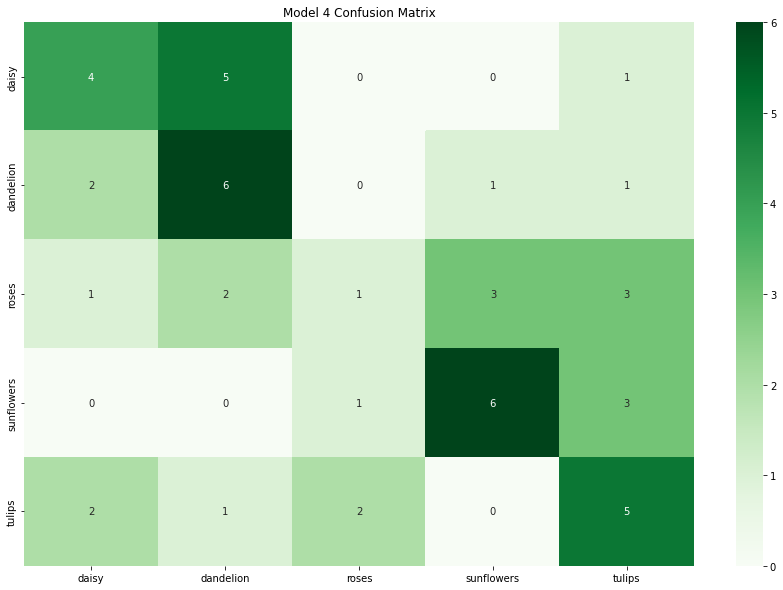

In [83]:
plot_confusion_matrix(X_t, y_t, model4, flowers_map, 'Model 4 Confusion Matrix')

### Model 5
En aquesta xarxa es farà ús de Data Augmentation, enriquir les imatges, així incrementat l'eficiència de la xarxa neuronal. Mitjançant un model de convolucionals bàsic, és a dir format per un bloc de 3 convolucionals i un altre de fully connected.

In [49]:
# Creem el Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30, # Probabilitat de girar-se entre 30º i 330º
                                                          width_shift_range=0.1, # Probabilitat de que es desplaci horitzontalment
                                                          height_shift_range=0.1, # Probabilitat de que es desplaci verticalment
                                                          shear_range=0.3, # Probabilitat de que es segmenti l'imatge per tal de formar un angle entre 0.3º i 357º
                                                          zoom_range=0.2, # Probabilitat de que s'apliqui una apliació a l'imatge
                                                          horizontal_flip=True) # Probabilitat de que s'inverteixi l'imatge horitzontalment)
datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=None)

train_generator = datagen.flow(X, y, batch_size=64)
validation_generator = datagen_val.flow(X_v, y_v)

In [50]:
model5 = models.Sequential([
    # Primera Convolució amb les dades d'entrada input
    layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X.shape[1:], name='Input_conv1'),
    layers.MaxPooling2D(2,2),
    # Segona Convolució
    layers.Conv2D(32, (3,3), padding='same', activation='relu', name='conv2'),
    layers.MaxPooling2D(2,2),
    # Tercera Convolució
    layers.Conv2D(64, (3,3), padding='same', activation='relu', name='conv3'),
    layers.MaxPooling2D(2,2),
    # Quarta Convolució
    layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # Aplanació dels resultats per encaixar-ho amb una DNN
    layers.Flatten(),
    layers.Dropout(0.2),

    # Capa densa de 254 neurones.
    layers.Dense(254, activation='relu', name='fullyconnected_'),
    # Capa dense output
    layers.Dense(5, activation='softmax', name='output')
])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model5.compile(loss="sparse_categorical_crossentropy",
               optimizer= custom_optimizer,
               metrics =["accuracy"])

In [51]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_conv1 (Conv2D)        (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv3 (Conv2D)              (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 64)        

In [52]:
history5 = model5.fit(train_generator, epochs=30, verbose=2, validation_data=validation_generator, batch_size=64)

Epoch 1/30
56/56 - 8s - loss: 1.2956 - accuracy: 0.4720 - val_loss: 1.5427 - val_accuracy: 0.4125 - 8s/epoch - 146ms/step
Epoch 2/30
56/56 - 4s - loss: 1.0727 - accuracy: 0.5746 - val_loss: 1.5063 - val_accuracy: 0.4625 - 4s/epoch - 66ms/step
Epoch 3/30
56/56 - 4s - loss: 1.0151 - accuracy: 0.5975 - val_loss: 1.4579 - val_accuracy: 0.5375 - 4s/epoch - 65ms/step
Epoch 4/30
56/56 - 4s - loss: 0.9780 - accuracy: 0.6124 - val_loss: 1.3931 - val_accuracy: 0.6125 - 4s/epoch - 66ms/step
Epoch 5/30
56/56 - 5s - loss: 0.9477 - accuracy: 0.6215 - val_loss: 1.3187 - val_accuracy: 0.6000 - 5s/epoch - 81ms/step
Epoch 6/30
56/56 - 5s - loss: 0.9216 - accuracy: 0.6401 - val_loss: 1.2341 - val_accuracy: 0.6125 - 5s/epoch - 85ms/step
Epoch 7/30
56/56 - 4s - loss: 0.9015 - accuracy: 0.6415 - val_loss: 1.1387 - val_accuracy: 0.6000 - 4s/epoch - 64ms/step
Epoch 8/30
56/56 - 4s - loss: 0.8802 - accuracy: 0.6655 - val_loss: 1.0113 - val_accuracy: 0.6875 - 4s/epoch - 64ms/step
Epoch 9/30
56/56 - 4s - loss: 0

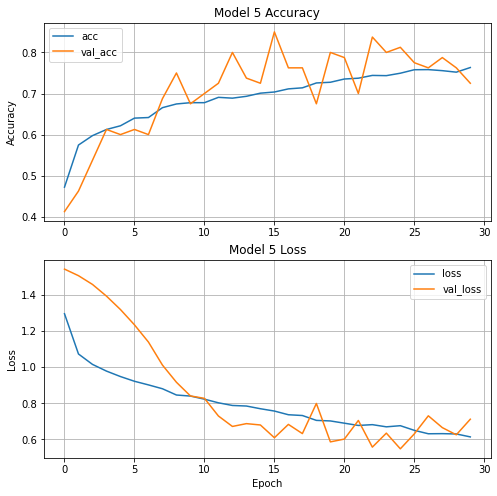

In [53]:
plot_acc_loss(history5, 'Model 5 Accuracy', 'Model 5 Loss')

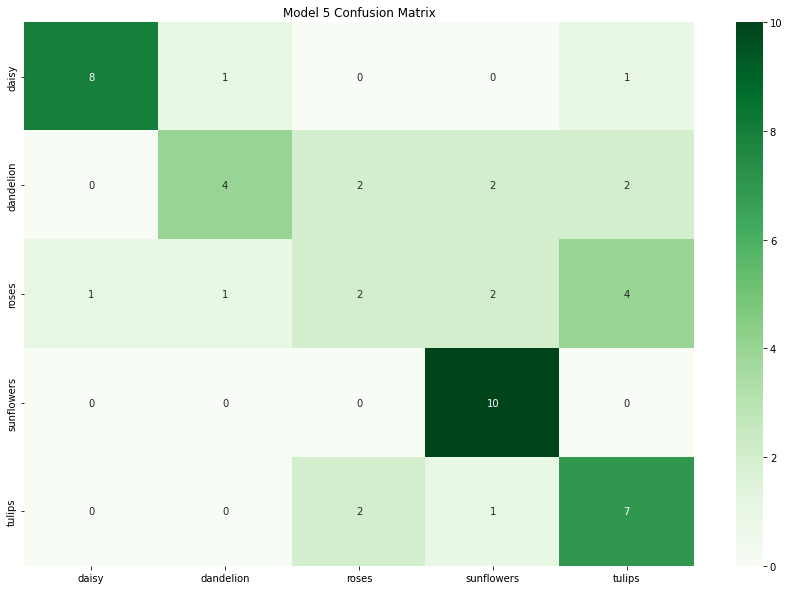

In [55]:
plot_confusion_matrix(X_t, y_t, model5, flowers_map, 'Model 5 Confusion Matrix')

### Model 6 - Transfer Learning
En aquesta xarxa es farà ús de Transfer Learning, mètode en el qual primer s'entrena la xarxa convolucional de manera congelada i es fa un segon entrenament amb tota la xarxa, anomenat fine-tuning.

Com a xarxa preentrenada he decidit fer ús de la Vgg16, una de les xarxes convolucionals més comunes.


In [56]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=X.shape[1:],
                   include_top=False, # Leave out the last fully connected layer
                   classes=5)

58889256/58889256 [==============================] - 0s 0us/step


In [57]:
base_model.trainable = False

In [58]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [59]:
inputs = layers.Input(shape=X.shape[1:], name='Input')
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation='softmax', name='output')(x)
model6 = tf.keras.Model(inputs=inputs, outputs=outputs, name="Transfer_Learning_Model")

In [60]:
custom_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0005)
model6.compile(optimizer=custom_optimizer,
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [61]:
model6.summary()

Model: "Transfer_Learning_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 output (Dense)              (None, 5)                 2565      
                                                                 
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
___________________________

In [62]:
history6 = model6.fit(train_generator, epochs=10, verbose=2, validation_data=(validation_generator), batch_size=64)

Epoch 1/10
56/56 - 7s - loss: 1.6681 - accuracy: 0.2737 - val_loss: 1.5401 - val_accuracy: 0.3125 - 7s/epoch - 125ms/step
Epoch 2/10
56/56 - 4s - loss: 1.4343 - accuracy: 0.4023 - val_loss: 1.3615 - val_accuracy: 0.4250 - 4s/epoch - 72ms/step
Epoch 3/10
56/56 - 4s - loss: 1.2886 - accuracy: 0.4994 - val_loss: 1.2393 - val_accuracy: 0.5375 - 4s/epoch - 71ms/step
Epoch 4/10
56/56 - 4s - loss: 1.1833 - accuracy: 0.5596 - val_loss: 1.1544 - val_accuracy: 0.5375 - 4s/epoch - 71ms/step
Epoch 5/10
56/56 - 4s - loss: 1.1116 - accuracy: 0.5811 - val_loss: 1.0794 - val_accuracy: 0.5875 - 4s/epoch - 72ms/step
Epoch 6/10
56/56 - 4s - loss: 1.0559 - accuracy: 0.6161 - val_loss: 1.0233 - val_accuracy: 0.6000 - 4s/epoch - 71ms/step
Epoch 7/10
56/56 - 4s - loss: 1.0213 - accuracy: 0.6285 - val_loss: 0.9850 - val_accuracy: 0.6500 - 4s/epoch - 71ms/step
Epoch 8/10
56/56 - 4s - loss: 0.9881 - accuracy: 0.6328 - val_loss: 0.9511 - val_accuracy: 0.6750 - 4s/epoch - 71ms/step
Epoch 9/10
56/56 - 5s - loss: 0

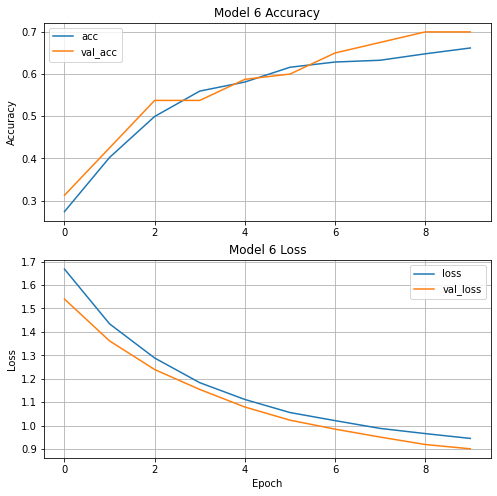

In [63]:
plot_acc_loss(history6, 'Model 6 Accuracy', 'Model 6 Loss')

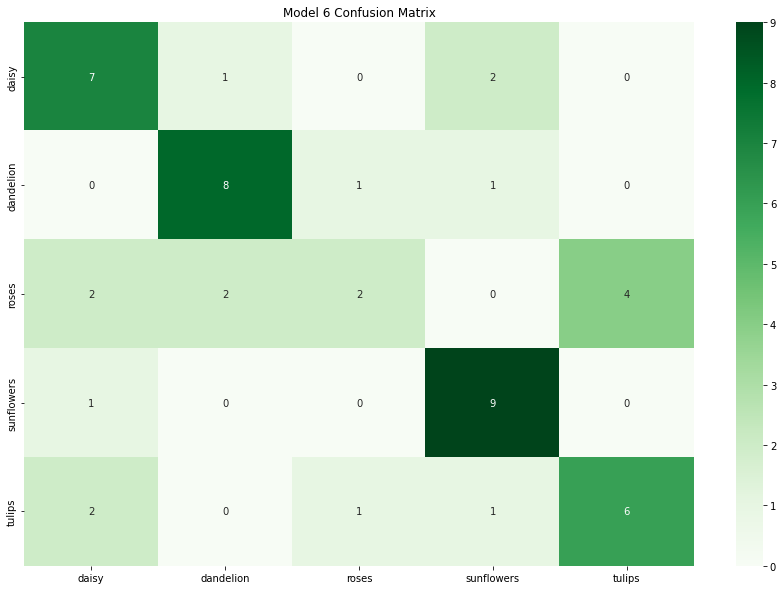

In [64]:
plot_confusion_matrix(X_t, y_t, model6, flowers_map, 'Model 6 Confusion Matrix')

#### Fine-Tuning
Procés de descongelar la xarxa preentrenada, de manera completa o només una part, i tornar a fer un entrenament amb un learning rate extremadament baix.

In [65]:
base_model.trainable = True # es descongela el model Vgg16

In [66]:
custom_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.000001)
model6.compile(optimizer=custom_optimizer,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [67]:
model6.summary()

Model: "Transfer_Learning_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 output (Dense)              (None, 5)                 2565      
                                                                 
Total params: 14,717,253
Trainable params: 14,717,253
Non-trainable params: 0
_______________________________

In [68]:
history_fine = model6.fit(train_generator, epochs=20, verbose=2, initial_epoch=history6.epoch[-1], validation_data=(validation_generator))

Epoch 10/20
56/56 - 9s - loss: 0.8586 - accuracy: 0.6847 - val_loss: 0.7710 - val_accuracy: 0.7500 - 9s/epoch - 155ms/step
Epoch 11/20
56/56 - 5s - loss: 0.8038 - accuracy: 0.6977 - val_loss: 0.7057 - val_accuracy: 0.7625 - 5s/epoch - 93ms/step
Epoch 12/20
56/56 - 5s - loss: 0.7795 - accuracy: 0.7062 - val_loss: 0.6825 - val_accuracy: 0.7500 - 5s/epoch - 93ms/step
Epoch 13/20
56/56 - 5s - loss: 0.7429 - accuracy: 0.7161 - val_loss: 0.6504 - val_accuracy: 0.7750 - 5s/epoch - 93ms/step
Epoch 14/20
56/56 - 5s - loss: 0.7231 - accuracy: 0.7246 - val_loss: 0.6363 - val_accuracy: 0.7750 - 5s/epoch - 94ms/step
Epoch 15/20
56/56 - 5s - loss: 0.6992 - accuracy: 0.7367 - val_loss: 0.6207 - val_accuracy: 0.7875 - 5s/epoch - 91ms/step
Epoch 16/20
56/56 - 5s - loss: 0.6823 - accuracy: 0.7444 - val_loss: 0.5936 - val_accuracy: 0.8000 - 5s/epoch - 92ms/step
Epoch 17/20
56/56 - 5s - loss: 0.6558 - accuracy: 0.7508 - val_loss: 0.6075 - val_accuracy: 0.8000 - 5s/epoch - 92ms/step
Epoch 18/20
56/56 - 5s 

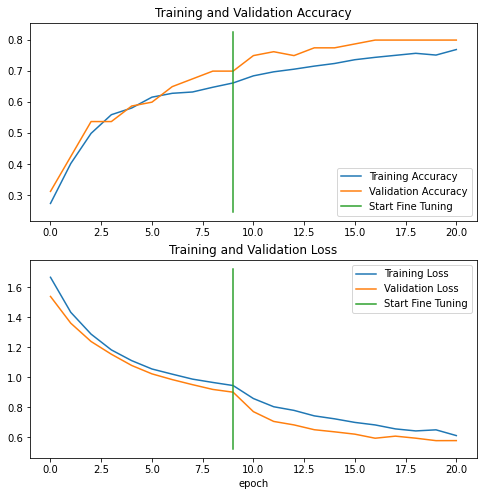

In [69]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history6.history['accuracy']+history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy']+history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.plot([9,9], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history6.history['loss']+history_fine.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss']+history_fine.history['val_loss'], label='Validation Loss')
plt.plot([9,9], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

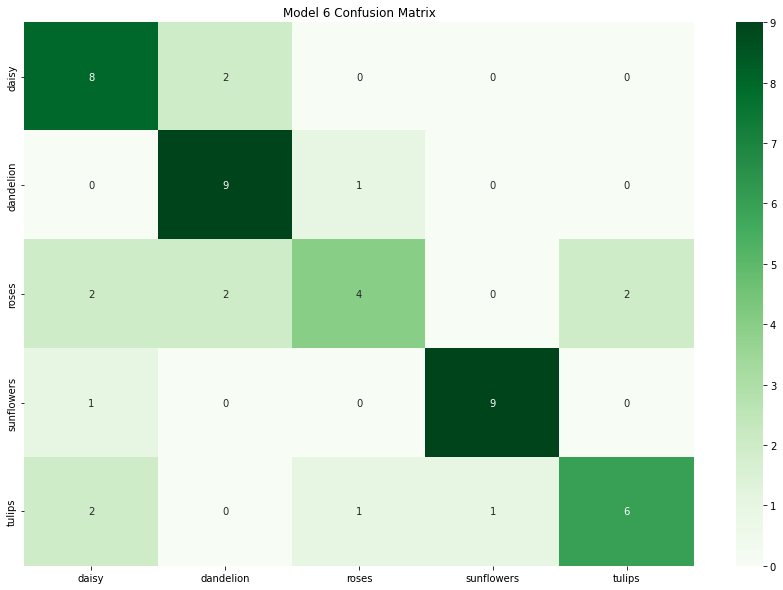

In [71]:
plot_confusion_matrix(X_t, y_t, model6, flowers_map, 'Model 6 Confusion Matrix')

## Conclusions
Es pot observar en la següent taula els diferents resultats per a cada model, envers el dataset d'entrenament, el dataset de validació i el dataset de testatge.

| Model          | Train Accuracy | Validation Accuracy | Test Accuracy |
|-----------------|----------------|:-------------------:|---------------|
| Model inicial  | 0.4893         | 0.4625              | 0.4200
| Model 1  | 0.5172         | 0.5500              | 0.4400
| Model 2  | 0.6627         | 0.6000              | 0.6400
| Model 3  | 0.9260         | 0.7750              | 0.6600
| Model 4  | 0.8901         | 0.7125              | 0.4400
| Model 5  | 0.7299         | 0.7250              | 0.6200
| Model 6  | 0.8011         | 0.8000              | 0.7200

Es pot observar que dependent del tipus de dataset que s'utilitzi per a comprovar els resultats són diferents.
* **Model inicial**: només format per una xarxa neuronal profunda hem obtingut uns resultats bastant baixos, això perquè no és el model específic per a l'ús de classificació d'imatges.
* **Model 1**: primer model basat en les convolucionals, aquest permet una millor generalització, tot i això, només s'aplica una convolucional.
* **Model 2**: primer model on hi ha 4 grups de convolucional, es pot observar una millora elavada respecte l'anterior.
* **Model 3**: pel fet que s'apliquen molts DropOut, és un model inestable, el qual pot variar molt en cada entrenament.
* **Model 4**: a l'aplicar la regularització kernel, es pot veure un creixement exponencial molt elevat al principi, aquest es veu disminuït un cop ha arribat al seu punt màxim.
* **Model 5**: a l'aplicar el Data Augmentation, les dades d'entrada estan més enriquides així produint un model estable amb bons resultats.
* **Model 6**: model més estable de tots, aquest a causa de la xarxa que té unes bones característiques, per tant, la xarxa fa una bona generalització. Encara que normalment el Transfer Learning és usat en xarxes on el conjunt de dades és elevat, s'ha pogut afirmar com en aquest cas també és un bon model per a la classificació del present dataset.

En les següents línies de codi es pot observar com podria ser utilitzat aquest algorisme, mitjançant el model 6 es procedeix a observar quin valor retorna si a la xarxa se li ofereix una imatge d'una tulipa i amb quin percentatge d'encert creu que correspon la imatge amb la classe de les tulipes.

Aquesta imatge pertany a Tulipans with a 99.44 %.

 * Pertany al grup Tulipans



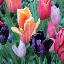

In [112]:
n = 0
predictions = model6.predict(X_t, verbose=0)
score = predictions[n]

print("Aquesta imatge pertany a {} with a {:.2f} %.\n\n * Pertany al grup {}\n"
    .format(flowers_mapca[np.argmax(score)], 100 * np.max(score), flowers_mapca[y_t[n]]))
cv2_imshow(X_t[n]*255)

Es pot concloure amb què aquesta activitat adjunta al TDR, ha permès el coneixement de diferents tipus d'algorismes i tècniques per a poder augmentar l'eficiència de XNA i els resultats d'aquestes, això observable en el conjunt de les construccions dels models.

Per tant, es considera que aquesta ha sigut una activitat satisfactoria, ja que ha complert amb els objectius que es tenien per a la creació d'aquest algorisme.